<h1>Prediction of housing prices</h1>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Loading&exploring data</h1>

In [44]:
df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [46]:
df.shape

(20640, 10)

In [47]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [48]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [49]:
df["ocean_proximity"] = df["ocean_proximity"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [50]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

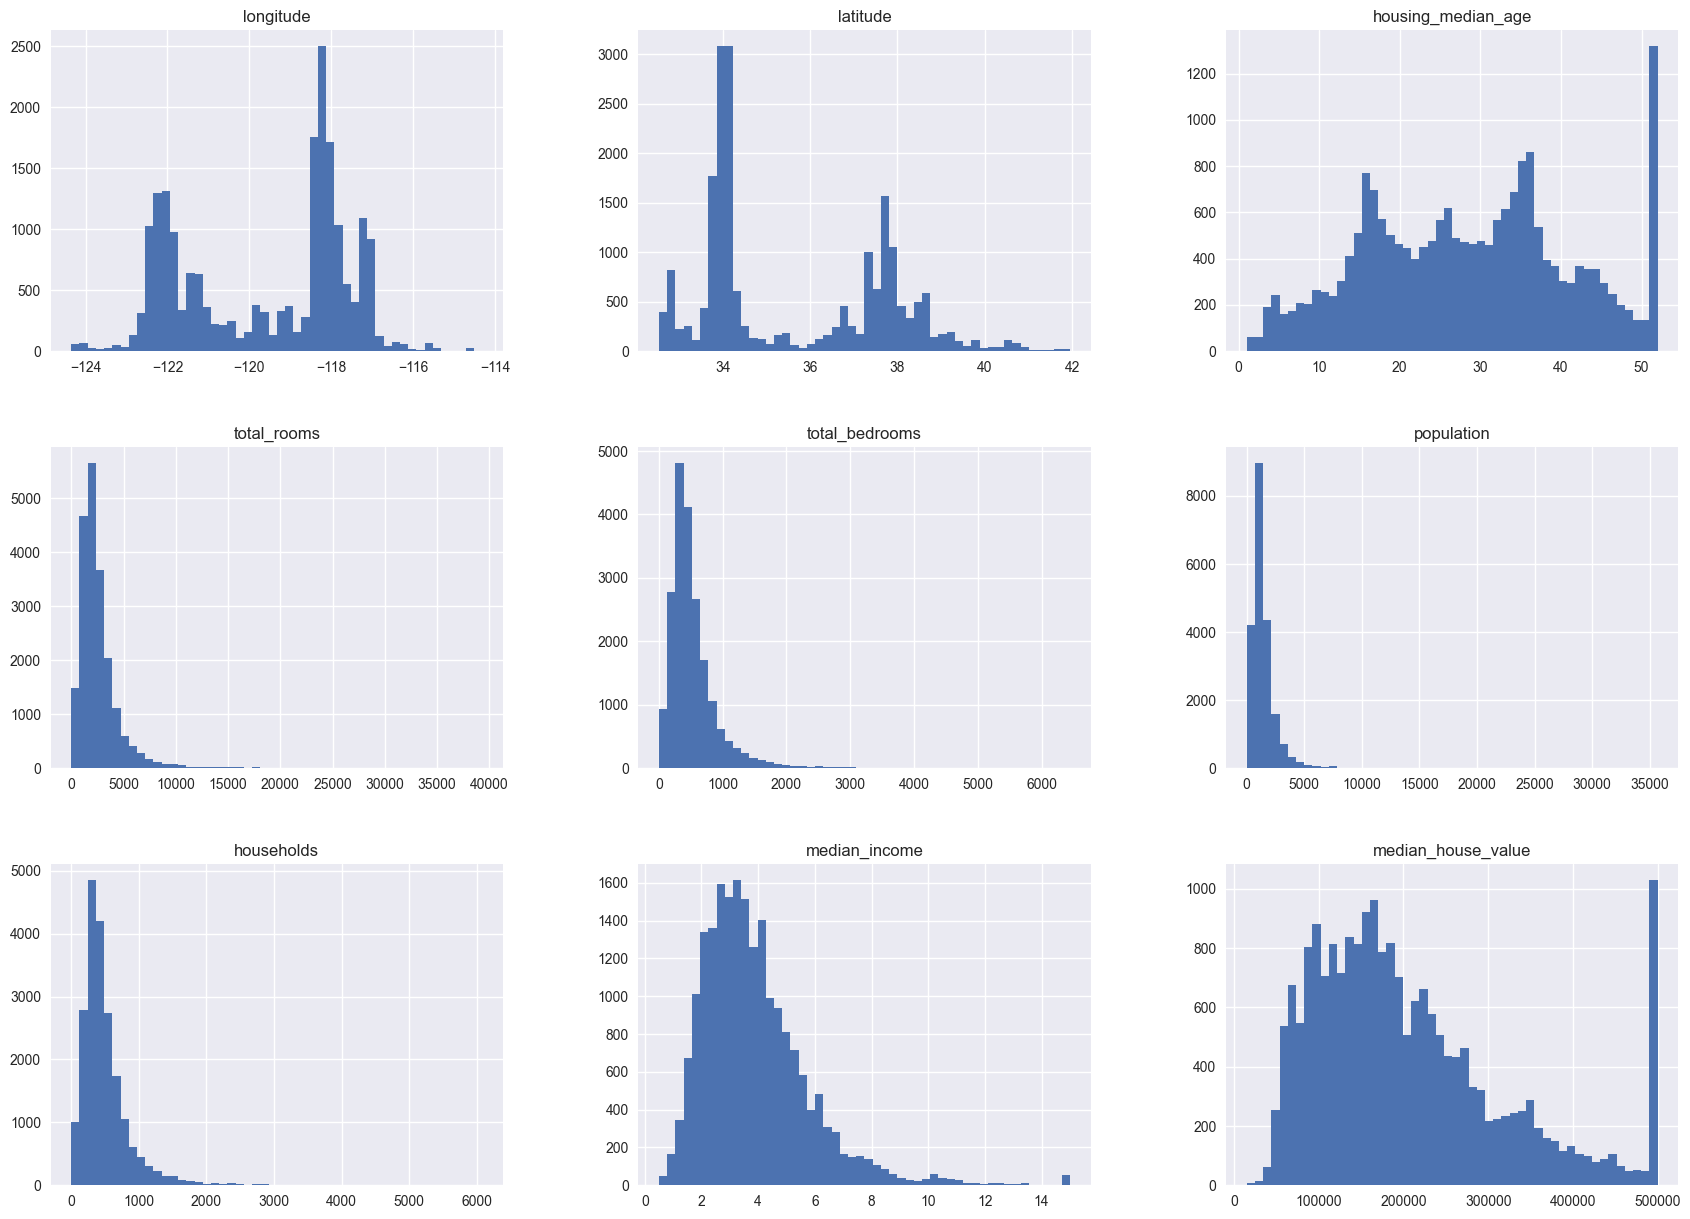

In [52]:
df.hist(bins=50, figsize=(21,15)) 

<BarContainer object of 5 artists>

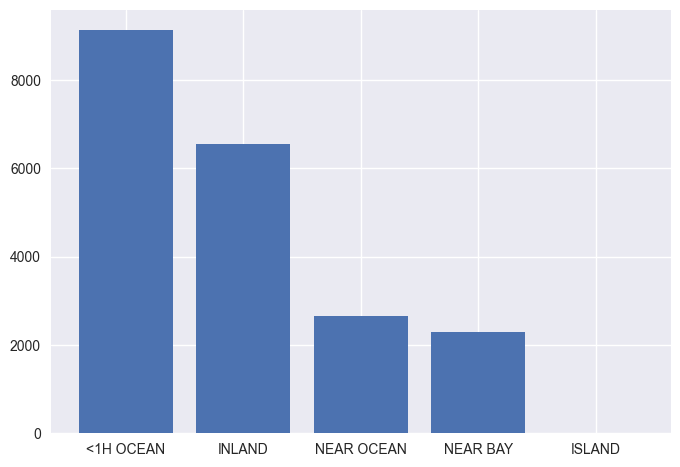

In [53]:
tempdict = dict( df["ocean_proximity"].value_counts() )
plt.bar(tempdict.keys(), tempdict.values())

<h2>Geography(state of California):</h2>

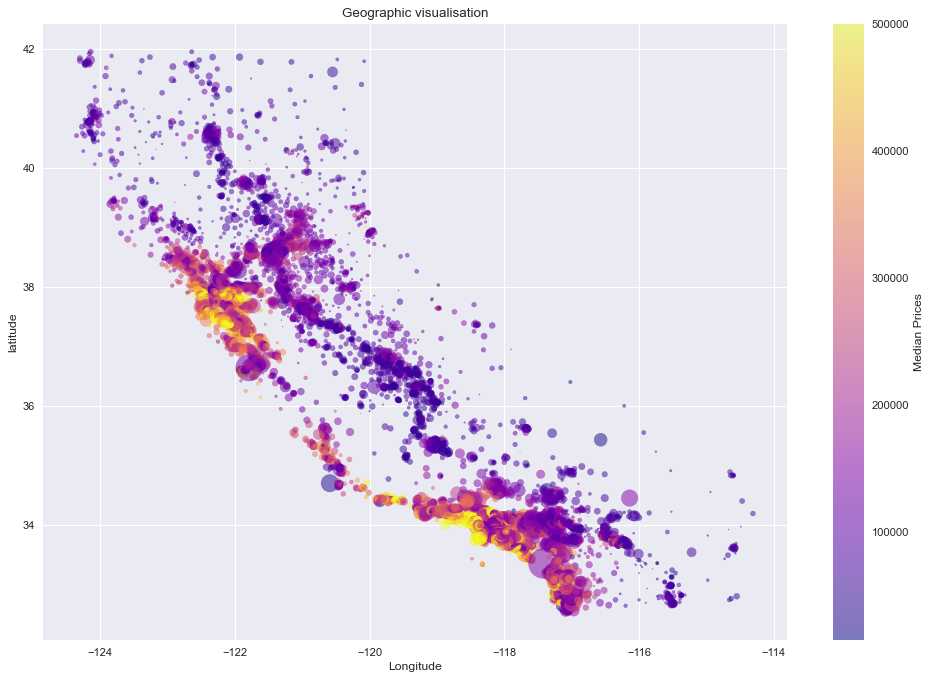

In [54]:
fig, ax = plt.subplots(dpi=80, figsize=(15,10))
sc = ax.scatter(x='longitude', y='latitude', alpha=0.5, data=df, 
           c='median_house_value', cmap='plasma',
           s=df['population']/50)
ax.set_xlabel('Longitude')
ax.set_ylabel('latitude')
ax.set_title('Geographic visualisation')
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Median Prices')
plt.show()

<h2>Correlation:</h2>

<Axes: xlabel='median_income', ylabel='median_house_value'>

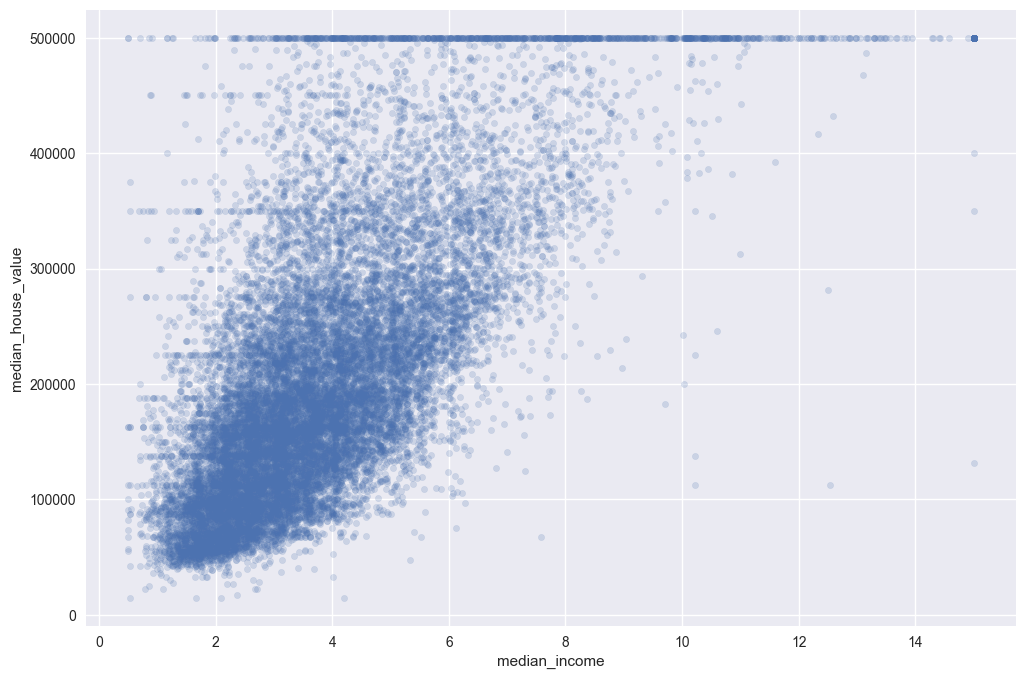

In [57]:
df.plot(x='median_income', y='median_house_value', kind='scatter', alpha=0.2, figsize=(12,8))

<h2>Data pre-processing</h2>

In [58]:
df = df.dropna()

In [59]:
df.shape

(20433, 10)

In [61]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

C:\Users\lunae\AppData\Local\Temp\ipykernel_10164\2778808237.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lunae\AppData\Local\Temp\ipykernel_10164\2778808237.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
mod_df = pd.get_dummies(df['ocean_proximity'])
mod_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [63]:
newdf = df.drop('ocean_proximity', axis=1).join(mod_df)
newdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,False,False,False,True,False


In [64]:
newdf.shape

(20433, 16)

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr = scaler.fit_transform( newdf[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
                                  'households','median_income','rooms_per_household','bedrooms_per_room']] )
scaled_arr

array([[-1.32731375,  1.05171726,  0.98216331, ...,  2.34516291,
         0.62539465, -1.1460242 ],
       [-1.32232256,  1.04235526, -0.60621017, ...,  2.33263161,
         0.3249418 , -0.98725423],
       [-1.33230494,  1.03767426,  1.85576873, ...,  1.78293943,
         1.15059359, -1.44051403],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -1.14317103,
        -0.09094308,  0.03680837],
       [-0.87311515,  1.77727236, -0.84446619, ..., -1.05513604,
        -0.04101319,  0.11820445],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.78060586,
        -0.07113779,  0.14049521]])

In [67]:
scaled_arr.shape

(20433, 10)

In [68]:
scaled_df = pd.DataFrame(scaled_arr, 
                         columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population',
                                  'households','median_income','rooms_per_household','bedrooms_per_room'])
scaled_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.706141
5,-1.337296,1.037674,1.855769,-0.785965,-0.770978,-0.893015,-0.801574,0.087213,-0.269721,0.323119
6,-1.337296,1.032993,1.855769,-0.046450,-0.115979,-0.292051,0.038103,-0.111656,-0.201152,-0.347344
7,-1.337296,1.032993,1.855769,0.213936,0.353912,-0.236456,0.386007,-0.395505,-0.255274,0.142951
8,-1.342287,1.032993,1.061582,-0.037298,0.301702,-0.193214,0.249984,-0.942881,-0.458026,0.814662
9,-1.337296,1.032993,1.855769,0.417577,0.401375,0.111238,0.561267,-0.094754,-0.185573,-0.238487


In [69]:
mod_df.index = scaled_df.index

finaltarget = newdf['median_house_value']
finaldf = scaled_df.join(mod_df)
finaldf.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-1.146024,False,False,False,True,False
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.987254,False,False,False,True,False
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-1.440514,False,False,False,True,False
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.492925,False,False,False,True,False
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.706141,False,False,False,True,False
5,-1.337296,1.037674,1.855769,-0.785965,-0.770978,-0.893015,-0.801574,0.087213,-0.269721,0.323119,False,False,False,True,False
6,-1.337296,1.032993,1.855769,-0.046450,-0.115979,-0.292051,0.038103,-0.111656,-0.201152,-0.347344,False,False,False,True,False
7,-1.337296,1.032993,1.855769,0.213936,0.353912,-0.236456,0.386007,-0.395505,-0.255274,0.142951,False,False,False,True,False
8,-1.342287,1.032993,1.061582,-0.037298,0.301702,-0.193214,0.249984,-0.942881,-0.458026,0.814662,False,False,False,True,False
9,-1.337296,1.032993,1.855769,0.417577,0.401375,0.111238,0.561267,-0.094754,-0.185573,-0.238487,False,False,False,True,False


In [70]:
print(finaldf.shape, '\t', finaltarget.shape)

(20433, 15) 	 (20433,)


<h2>Splitting the dataset:</h2>

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finaldf, finaltarget, test_size=0.3, random_state=5)
print(X_train.shape, '\n', X_test.shape, '\n', y_train.shape, '\n', y_test.shape)

(14303, 15) 
 (6130, 15) 
 (14303,) 
 (6130,)


<h2>Linear regression</h2>

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [74]:
print('Predictions:\t', lin_reg.predict(X_train))
print('True values:\t', y_train)

Predictions:	 [353387.2886613  252523.76280918 374831.14362387 ...  41714.54768234
  39252.7344103  110323.29903027]
True values:	 18373    361200.0
1716     173500.0
16948    464600.0
7475     145700.0
18610    196400.0
           ...   
1038     107200.0
5577     232400.0
3070      62200.0
18817     71000.0
2938      76200.0
Name: median_house_value, Length: 14303, dtype: float64


In [75]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_train, lin_reg.predict(X_train) )
lin_rmse = np.sqrt(lin_mse)
print('RMSE:', lin_rmse)

RMSE: 68002.71187452169


<h2>Decision tree:</h2>

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [77]:
print('Predictions:\t', tree_reg.predict(X_train))
print('True values:\t', y_train)

Predictions:	 [361200. 173500. 464600. ...  62200.  71000.  76200.]
True values:	 18373    361200.0
1716     173500.0
16948    464600.0
7475     145700.0
18610    196400.0
           ...   
1038     107200.0
5577     232400.0
3070      62200.0
18817     71000.0
2938      76200.0
Name: median_house_value, Length: 14303, dtype: float64


In [78]:
tree_mse = mean_squared_error(y_train, tree_reg.predict(X_train) )
tree_rmse = np.sqrt(tree_mse)
print('RMSE:', tree_rmse)

RMSE: 0.0


<h2>Random forests:</h2>

In [79]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
print('Predictions:\t', forest_reg.predict(X_train))
print('True values:\t', y_train)

Predictions:	 [346218.   173070.   456364.1  ...  67455.    78594.96  77981.  ]
True values:	 18373    361200.0
1716     173500.0
16948    464600.0
7475     145700.0
18610    196400.0
           ...   
1038     107200.0
5577     232400.0
3070      62200.0
18817     71000.0
2938      76200.0
Name: median_house_value, Length: 14303, dtype: float64


In [81]:
forest_mse = mean_squared_error(y_train, forest_reg.predict(X_train) )
forest_rmse = np.sqrt(forest_mse)
print('RMSE:', forest_rmse)

RMSE: 18594.14809925205


<h2>Cross-validation evaluation:</h2>

In [82]:
from sklearn.model_selection import cross_val_score

def cross_rmse(model):
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
    rmse = np.sqrt(-scores)
    print(rmse.mean())
    
cross_rmse(lin_reg)
cross_rmse(tree_reg)
cross_rmse(forest_reg)

68257.16070852095
70757.15619908733
50136.81250806544


<h2>Hyperparameter tuning:</h2>

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'bootstrap':[True,False], 'n_estimators':[5,10,25,50], 'max_features':[3,8,11,15]}

ft_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV( ft_forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [3, 8, 11, 15],
                         'n_estimators': [5, 10, 25, 50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [84]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [85]:
cvres = grid_search.cv_results_

for meanscore, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-meanscore), '\t', params)

58358.90367878253 	 {'bootstrap': True, 'max_features': 3, 'n_estimators': 5}
54803.500474950015 	 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
52413.02250361818 	 {'bootstrap': True, 'max_features': 3, 'n_estimators': 25}
52175.57237032892 	 {'bootstrap': True, 'max_features': 3, 'n_estimators': 50}
55786.12296990793 	 {'bootstrap': True, 'max_features': 8, 'n_estimators': 5}
52795.536017915205 	 {'bootstrap': True, 'max_features': 8, 'n_estimators': 10}
51160.862848453275 	 {'bootstrap': True, 'max_features': 8, 'n_estimators': 25}
50526.268908250866 	 {'bootstrap': True, 'max_features': 8, 'n_estimators': 50}
55809.39201932522 	 {'bootstrap': True, 'max_features': 11, 'n_estimators': 5}
52585.315299413574 	 {'bootstrap': True, 'max_features': 11, 'n_estimators': 10}
50850.694337382745 	 {'bootstrap': True, 'max_features': 11, 'n_estimators': 25}
50108.922220568485 	 {'bootstrap': True, 'max_features': 11, 'n_estimators': 50}
55554.72803826692 	 {'bootstrap': True, 'max

In [86]:
sorted( zip(grid_search.best_estimator_.feature_importances_, X_train.columns), reverse=True)

[(0.3704276639731876, 'median_income'),
 (0.1591951146609473, 'INLAND'),
 (0.10801423245951523, 'longitude'),
 (0.09027067058908786, 'latitude'),
 (0.07559745147918275, 'bedrooms_per_room'),
 (0.046169525202500054, 'rooms_per_household'),
 (0.04376292620910915, 'housing_median_age'),
 (0.02762247768896267, 'population'),
 (0.021094149324555403, 'total_rooms'),
 (0.020489690692324966, 'total_bedrooms'),
 (0.018273906760695985, 'households'),
 (0.009918593503317162, '<1H OCEAN'),
 (0.0071680150061736655, 'NEAR OCEAN'),
 (0.0016729170769554389, 'NEAR BAY'),
 (0.0003226653734847865, 'ISLAND')]

<h2>Test set evaluation:</h2>

In [87]:
best_model = grid_search.best_estimator_
test_mse = mean_squared_error(y_test, best_model.predict(X_test))
test_rmse = np.sqrt(test_mse)
test_rmse

48339.37597070148